In [1]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
##Merging 12 months of sales data into single file.

In [3]:
df=pd.read_csv(r"D:\Users\abhisv\Documents\Metro bank\sales analysis\Sales_April_2019.csv")
df.head()

FileNotFoundError: [Errno 2] File b'D:\\Users\\abhisv\\Documents\\Metro bank\\sales analysis\\Sales_April_2019.csv' does not exist: b'D:\\Users\\abhisv\\Documents\\Metro bank\\sales analysis\\Sales_April_2019.csv'

In [3]:
##Reading all files from directory using od listdir
files=[file for file in os.listdir(r"D:\Users\abhisv\Documents\Metro bank\sales analysis")]
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("D:/Users/abhisv/Documents/Metro bank/sales analysis/"+file)
    all_months_data=pd.concat([all_months_data,df])

    all_months_data.to_csv('all_data.csv',index=False)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\Users\\abhisv\\Documents\\Metro bank\\sales analysis'

In [4]:
###Read updated csv
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [95]:
all_data.shape

(186850, 6)

In [96]:
all_data.isna().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [97]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
#As oly 545 rows are having null values, lets remove them
all_data.dropna(how='all',inplace=True)

In [102]:
all_data.shape

(186305, 6)

In [109]:
##Lets find 'Or' and delete it
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,19,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,07,19
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,12,19
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,12,19
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,30,19


In [110]:
##Add few columns
    ##Add month column
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Day']=all_data['Order Date'].str[3:5]
all_data['Year']=all_data['Order Date'].str[6:8]
all_data['Month']=all_data['Month'].astype('int')

In [112]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,07,19
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,19


In [117]:
all_data[all_data['Quantity Ordered']=='11.95']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year


In [118]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

In [119]:
#Task 3: Add a sales column
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [121]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,07,19,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,19,11.99


In [24]:
##Question1: What was the best month for Slaes? And how much was earned on that month

In [125]:
results=all_data.groupby('Month').sum()

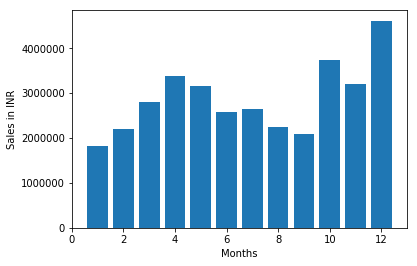

In [131]:
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xlabel('Months')
plt.ylabel('Sales in INR')
plt.show()

In [132]:
##Question 2: Which city as highest number of sales?

In [134]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,07,19,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,19,11.99


In [ ]:
##To extract city column from address, better to use apply method.

In [155]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']=all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ('+get_state(x) + ')')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,19,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,07,19,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,19,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,19,11.99,Los Angeles (CA)


In [158]:
results=all_data.groupby('City').sum()
print(results)

                     Quantity Ordered    Price Each   Month         Sales
City                                                                     
 Atlanta (GA)                   16602  2.779908e+06  104794  2.795499e+06
 Austin (TX)                    11153  1.809874e+06   69829  1.819582e+06
 Boston (MA)                    22528  3.637410e+06  141112  3.661642e+06
 Dallas (TX)                    16730  2.752628e+06  104620  2.767975e+06
 Los Angeles (CA)               33289  5.421435e+06  208325  5.452571e+06
 New York City (NY)             27932  4.635371e+06  175741  4.664317e+06
 Portland (ME)                   2750  4.471893e+05   17144  4.497583e+05
 Portland (OR)                  11303  1.860558e+06   70621  1.870732e+06
 San Francisco (CA)             50239  8.211462e+06  315520  8.262204e+06
 Seattle (WA)                   16553  2.733296e+06  104941  2.747755e+06


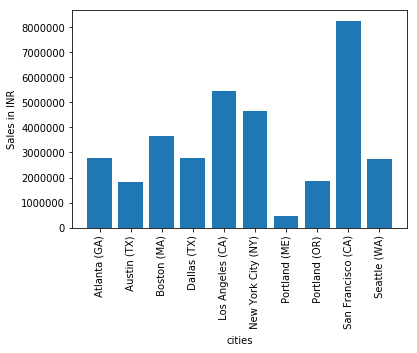

In [164]:
##As the result above the san francisco is having high sales, in graph the austin is having high value.
##So lets modify something in code
#cities=all_data.City.unique()
cities=[city for city,df in all_data.groupby('City')] #Use this.
plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=10)
plt.xlabel('cities')
plt.ylabel('Sales in INR')
plt.show()

In [ ]:
##Question 3- What time should we display advertisement, to maximize the likelihood of customer's buying product?

In [165]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date']) #Converting the datatype of Order date into date time.

In [166]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute #Extracting Hour and Mniutes seperately

In [168]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,19,19,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,07,19,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,30,19,11.99,Los Angeles (CA),9,27


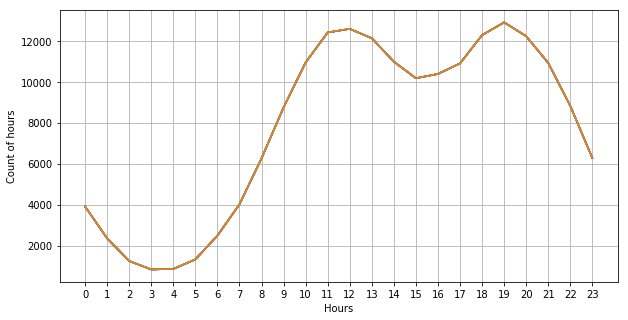

In [178]:
hours=[hour for hour, df in all_data.groupby('Hour')]
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(hours,all_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Count of hours')
plt.show()

#The maximum advertisement can be done during 11AM and 7PM.

In [ ]:
##Question 4- What products are most often sold together.

In [228]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ' ,'.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Year,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,600.00,Los Angeles (CA),14,38,"Google Phone ,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,12,19,11.99,Los Angeles (CA),14,38,"Google Phone ,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,03,19,600.00,Los Angeles (CA),19,42,"Google Phone ,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,03,19,11.95,Los Angeles (CA),19,42,"Google Phone ,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,07,19,99.99,Boston (MA),11,31,"Bose SoundSport Headphones ,Bose SoundSport He..."


In [229]:
df.shape

(14649, 14)

In [230]:
df=df[['Order ID','Grouped']].drop_duplicates()

In [231]:
df.shape

(7136, 2)

In [232]:
##Lets import few libraries itertools and collections.
from itertools import combinations
from collections import Counter

count=Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,value)

('iPhone ', 'Lightning Charging Cable') 886
('Google Phone ', 'USB-C Charging Cable') 859
('iPhone ', 'Wired Headphones') 443
('Google Phone ', 'Wired Headphones') 405
('iPhone ', 'Apple Airpods Headphones') 329
('Vareebadd Phone ', 'USB-C Charging Cable') 312
('Google Phone ', 'Bose SoundSport Headphones') 192
('USB-C Charging Cable ', 'Wired Headphones') 154
('Vareebadd Phone ', 'Wired Headphones') 140
('Google Phone ', 'USB-C Charging Cable ') 128


In [227]:
###Question 4-What product sold the most? Why do you think it sold most?

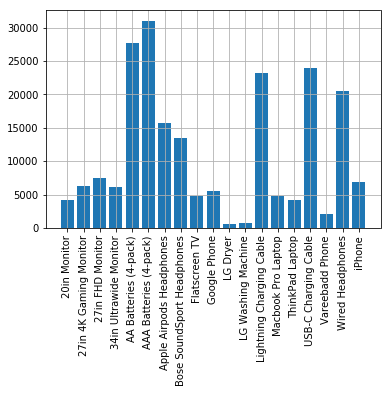

In [254]:
product_group=all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']
quantity_ordered
products=[product for product, df in product_group]
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation='vertical')
plt.grid()
plt.show()

In [255]:
#If we see most lower priced products are sold more, compared to high price products.
#Lets create the hypothesis Ho= The price of more sold products have lower price
#For this instead of doing statistical test, w ecan justify based on graph.

##Ans- As per the below graph, the Ho is true.

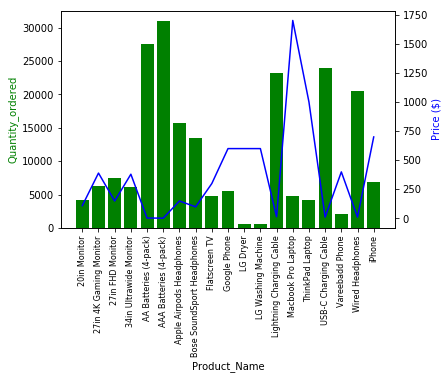

In [273]:
prices=all_data.groupby('Product').mean()['Price Each']
#plot secondary y axis on above plot
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product_Name')
ax1.set_ylabel('Quantity_ordered',color='g')
ax2.set_ylabel('Price ($)',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()

In [ ]:
##################################################################################################################################

In [ ]:
#Data analysis using Matplotlib and pandas

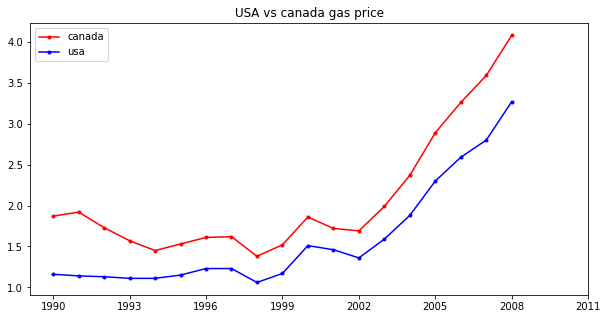

In [293]:
gas=pd.read_csv(r"D:\Users\abhisv\Documents\Metro bank\gas_prices.csv")
gas.head(2)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.plot(gas.Year,gas.Canada,'r.-',label='canada')
plt.plot(gas.Year,gas.USA,'b.-',label='usa')
plt.title('USA vs canada gas price')
plt.xticks(gas.Year[::3].tolist()+[2011])
plt.legend()
plt.show()

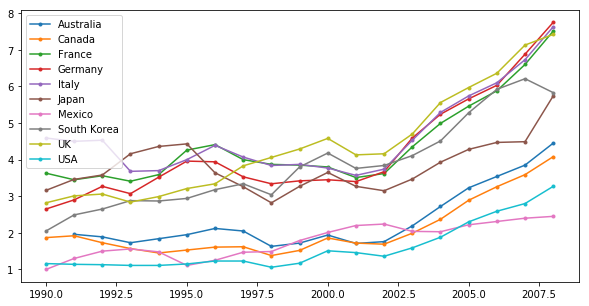

In [308]:
plt.figure(figsize=(10,5))
for country in gas:
    if country!='Year':
        plt.plot(gas.Year,gas[country],marker='.')
        
plt.legend()
plt.show()

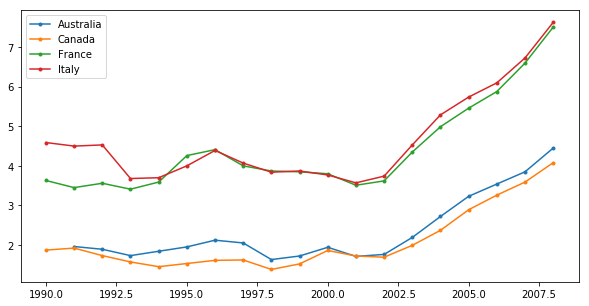

In [309]:
plt.figure(figsize=(10,5))
countries_to_look_at=['Australia','Canada','France','Italy']
for country in gas:
    if country in countries_to_look_at:
        plt.plot(gas.Year,gas[country],marker='.')
        
plt.legend()
plt.show()

In [ ]:
##color picker

In [314]:
fifa=pd.read_csv(r"D:\Users\abhisv\Documents\Metro bank\fifa_data.csv")
fifa.head(1)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M


In [321]:
fifa.Weight=[int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

In [325]:
fifa.Weight[0]

159.0

In [336]:
light=fifa.loc[fifa.Weight<125].count()[0]
light_medium=fifa.loc[(fifa.Weight>=125)&(fifa.Weight<150)].count()[0]
medium=fifa.loc[(fifa.Weight>=150)&(fifa.Weight<175)].count()[0]
medium_heavy=fifa.loc[(fifa.Weight>=175)&(fifa.Weight<200)].count()[0]
heavy=fifa.loc[(fifa.Weight>=200)].count()[0]

weights=[light,light_medium,medium,medium_heavy,heavy]

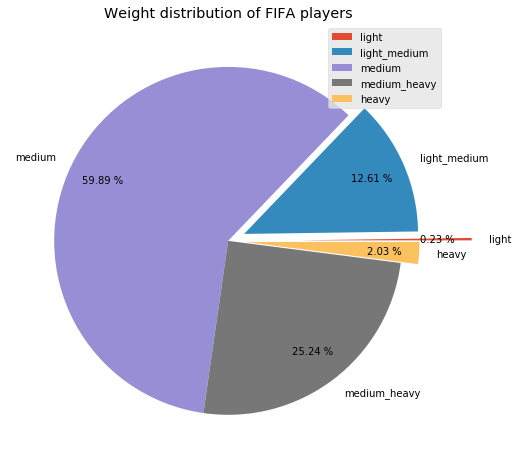

In [354]:
labels=['light','light_medium','medium','medium_heavy','heavy']
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.title('Weight distribution of FIFA players')
explode=[0.4,0.1,0,0,0.1]
plt.pie(weights,labels=labels,autopct='%0.2f %%',pctdistance=0.8,explode=explode)
plt.legend()
plt.show()

In [357]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


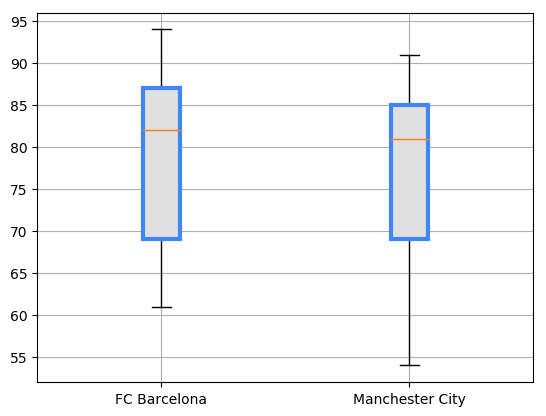

In [393]:
plt.style.use('default')
Barcelona=fifa.loc[fifa.Club=='FC Barcelona']['Overall']
Manchester=fifa.loc[fifa.Club=='Manchester City']['Overall']
labels=['FC Barcelona','Manchester City']
boxes=plt.boxplot([Barcelona,Manchester],labels=labels,patch_artist=True)
for box in boxes['boxes']:
    #set edge colours
    box.set(color='#4286f4',linewidth=3)
    #Change Fill color
    box.set(facecolor='#e0e0e0')
plt.grid()
plt.show()

In [ ]:
###############Plotly and cufflinks
#Use plotly express to build the objects and graph objects to customixe the graph

In [557]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
%matplotlib inline

#In order to work in offline
from plotly.offline import init_notebook_mode, download_plotlyjs,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()